In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, minmax_scale, robust_scale

import seaborn as sns
%matplotlib inline

In [2]:
#matplotlib 패키지 한글 깨짐 처리 시작
#한글 폰트(맑은 고딕) 적용 : 윈도우, 구글 콜랩
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'

#seaborn에서 한글 깨짐 해결
#minus 깨짐현상 방지


In [3]:
df_fitness = pd.read_csv("./Data/FITNESS.csv", engine = "python", encoding="euc-kr")
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


# 1. Barplot그리기

## Step1. BarChart 생성_성별

<AxesSubplot:>

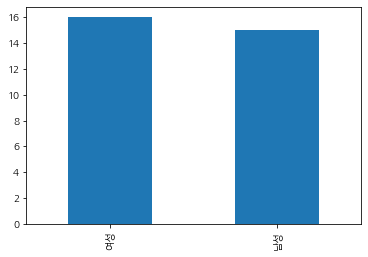

In [4]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

<AxesSubplot:xlabel='GENDER', ylabel='count'>

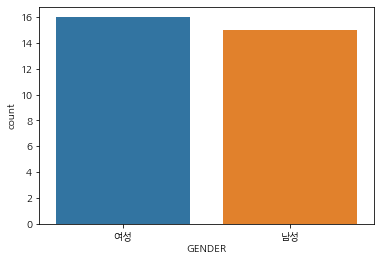

In [5]:
sns.countplot(x = 'GENDER', data = df_fitness)

<AxesSubplot:>

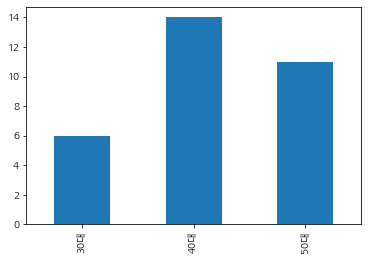

In [6]:
df_count = df_fitness["AGEGROUP"].value_counts()

df_count.sort_index(inplace = True)
df_count.plot.bar()

<AxesSubplot:xlabel='AGEGROUP', ylabel='count'>

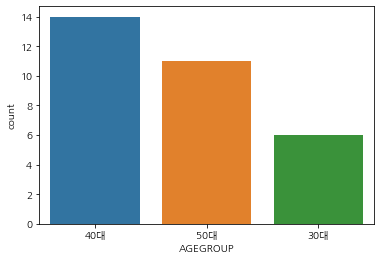

In [7]:
sns.countplot(x="AGEGROUP", data=df_fitness,
              order = df_fitness["AGEGROUP"].value_counts().index)


## BarChart 생성_성별과 연령대별 BarChart

<AxesSubplot:xlabel='GENDER,AGEGROUP'>

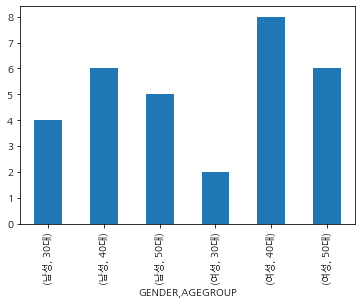

In [8]:
df_groupby_total=df_fitness.groupby(["GENDER", "AGEGROUP"], as_index=True).size()

df_groupby_total.plot.bar()

<AxesSubplot:xlabel='AGEGROUP', ylabel='count'>

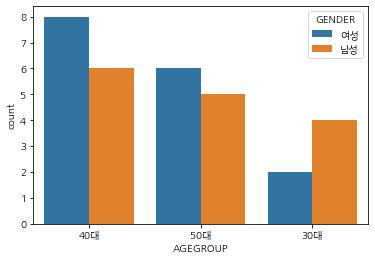

In [9]:
# sns로 그려보기
sns.countplot(x = "AGEGROUP", hue = "GENDER", data=df_fitness,
             order = df_fitness["AGEGROUP"].value_counts().index)

# 2. 히스토그램 그리기

<AxesSubplot:>

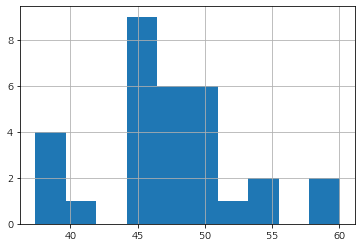

In [10]:
# 히스토그램 그리기
df_fitness["OXY"].hist()

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'OXY'}>],
       [<AxesSubplot:title={'center':'RUNTIME'}>,
        <AxesSubplot:title={'center':'RUNPULSE'}>,
        <AxesSubplot:title={'center':'RSTPULSE'}>],
       [<AxesSubplot:title={'center':'MAXPULSE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

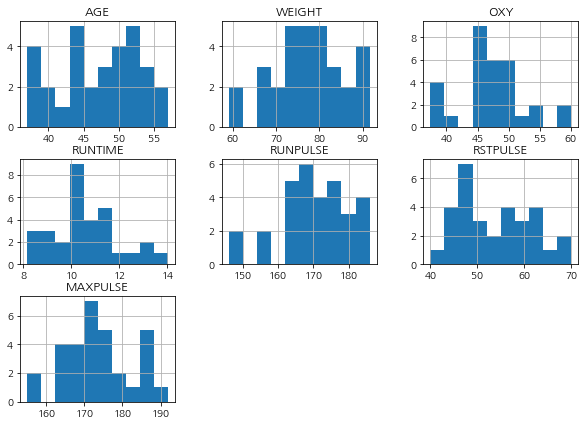

In [11]:
df_fitness.hist(figsize = (10, 7))

array([<AxesSubplot:title={'center':'남성'}>,
       <AxesSubplot:title={'center':'여성'}>], dtype=object)

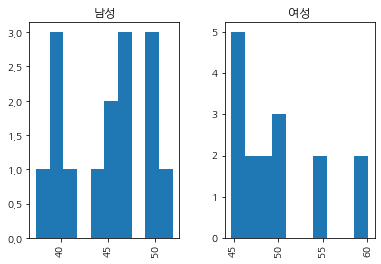

In [12]:
## 성별 혈당 산소 요구량 (hist(column=변수, by = 그룹변수))
df_fitness.hist(column = "OXY", by = "GENDER")

array([<AxesSubplot:title={'center':'남성'}>,
       <AxesSubplot:title={'center':'여성'}>], dtype=object)

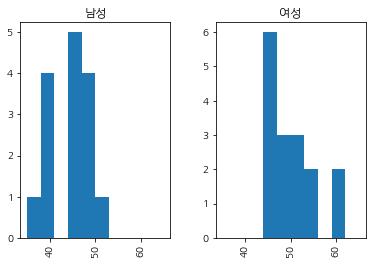

In [13]:
df_fitness.hist(column = "OXY", by = "GENDER", range = (35, 65))

## histogram 생성: 중첩 Histogram_성별 혈당 산소 요구량

Text(0.5, 1.0, '여성 vs. 남성, 혈당 산소요구량')

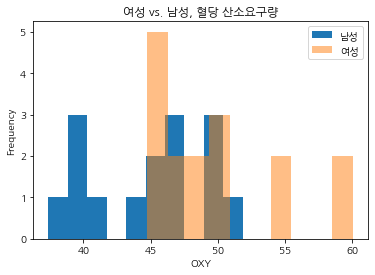

In [46]:
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"], label="남성", alpha=1)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"], label="여성", alpha=0.5)

plt.legend()
plt.xlabel("OXY")
plt.ylabel("Frequency")
plt.title("여성 vs. 남성, 혈당 산소요구량")

# 남성은 낮은 수준에, 여성은 높은 수준에 분포되어 있다.

## Step5. Histogram 생성: X축의 구간(bin) 수를 변경

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <BarContainer object of 10 artists>)

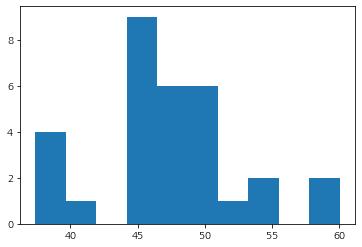

In [15]:
plt.hist(x = "OXY", data = df_fitness)

(array([ 5.,  3., 12.,  7.,  2.,  2.]),
 array([37.388     , 41.16583333, 44.94366667, 48.7215    , 52.49933333,
        56.27716667, 60.055     ]),
 <BarContainer object of 6 artists>)

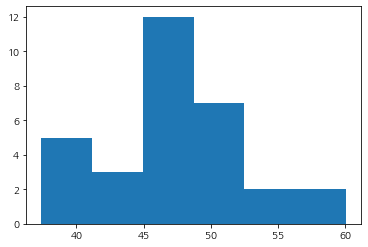

In [16]:
plt.hist(x = "OXY", data = df_fitness, bins = 6)

## 3. Box Plot 그리기
- X는 범주형, Y는 연속형일 때 비교

<AxesSubplot:>

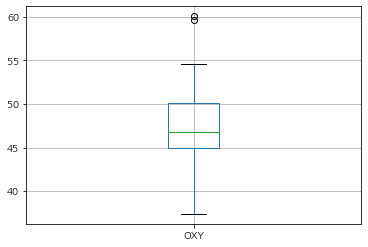

In [17]:
df_fitness.boxplot(column="OXY")

<AxesSubplot:title={'center':'OXY'}, xlabel='GENDER'>

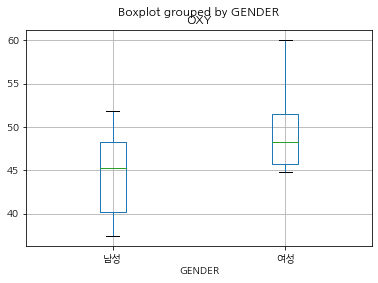

In [18]:
df_fitness.boxplot(column="OXY", by="GENDER")

<AxesSubplot:title={'center':'OXY'}, xlabel='[GENDER, AGEGROUP]'>

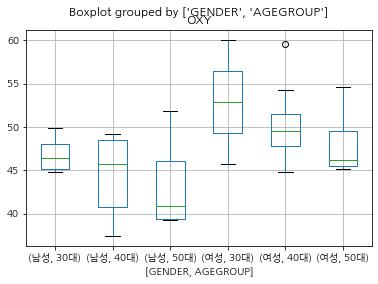

In [19]:
df_fitness.boxplot(column="OXY", by=["GENDER","AGEGROUP"])

<AxesSubplot:title={'center':'OXY'}, xlabel='GENDER'>

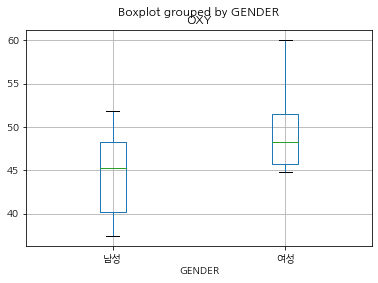

In [42]:
df_fitness.boxplot(column="OXY", by="GENDER")

In [ ]:
from matplotlib import font_manager as fm

[(f.name) for f in fm.fontManager.ttflist if 'KR' in f.name]

# 4. PieChart 그리기
- column 기준 자료 요약

<AxesSubplot:ylabel='None'>

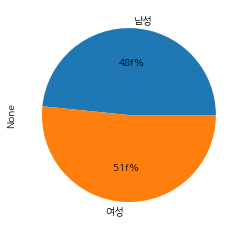

In [21]:
df_count = df_fitness.groupby(["GENDER"]).size()

# autopct = 비율 %로 표시(%.1f%%: 소수점 1자리 적용)
df_count.plot.pie(y = "OXY", autopct="%.if%%")

<AxesSubplot:ylabel='None'>

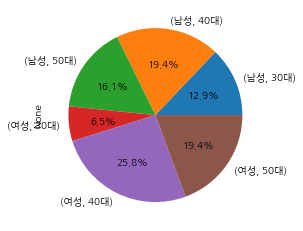

In [22]:
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()

df_count.plot.pie(y="OXY", autopct="%.1f%%")

# 5. Scatter Plot 그리기

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

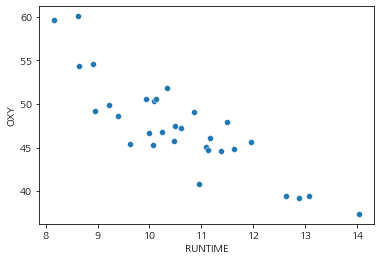

In [23]:
sns.scatterplot(x = "RUNTIME", y = "OXY", data = df_fitness)

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

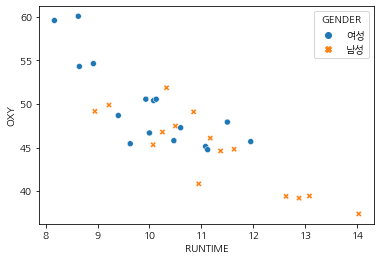

In [24]:
sns.scatterplot(x="RUNTIME", y = "OXY", hue="GENDER", style = "GENDER", data=df_fitness)

# 6. Scatter Matrix

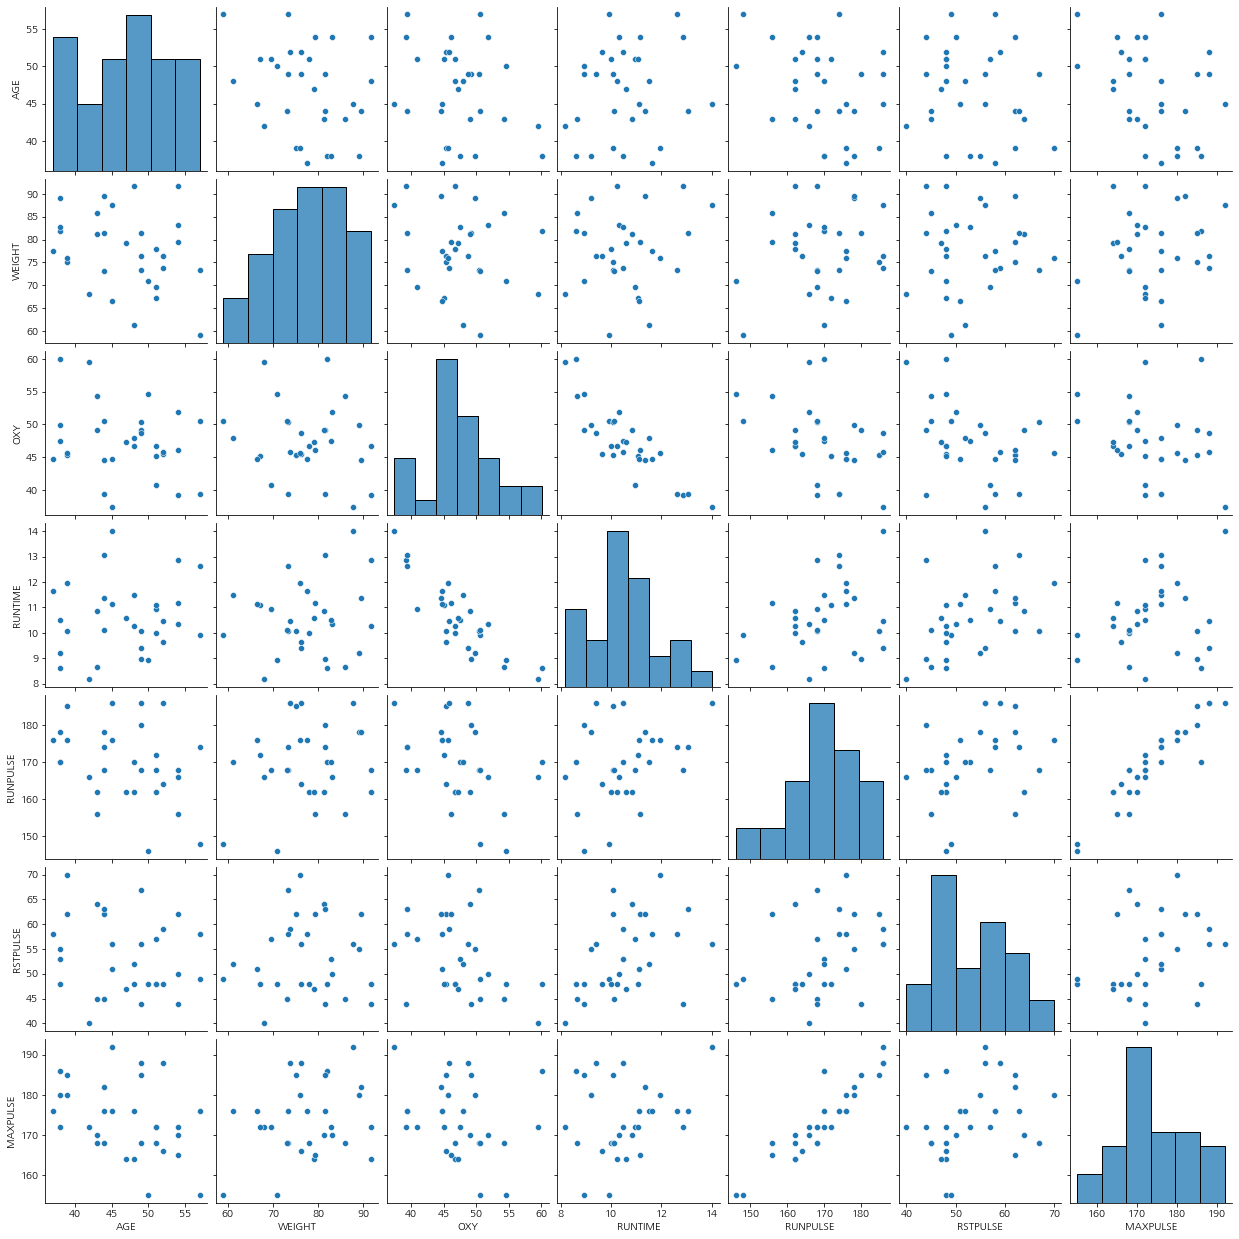

In [25]:
sns.pairplot(df_fitness)

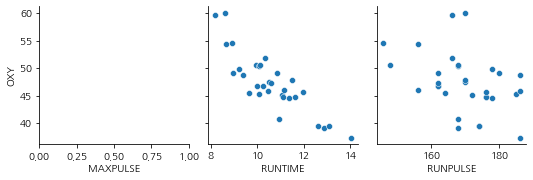

In [26]:
sns.pairplot(df_fitness, y_vars=["OXY"], x_vars=["MAXPULSE","RUNTIME", "RUNPULSE"])

# 7. Trend Chart

In [27]:
df_currency = pd.read_csv("./Data/환율.csv", engine="python", parse_dates=["APPL_DATE"])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [28]:
df_currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CURRENCY       273 non-null    object        
 1   APPL_DATE      273 non-null    datetime64[ns]
 2   STD_RATE       273 non-null    float64       
 3   USD_CONV_DATE  273 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 8.7+ KB


In [29]:
df_currency_pivot = df_currency.pivot(index="APPL_DATE", 
                                      columns="CURRENCY", values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


<AxesSubplot:xlabel='APPL_DATE'>

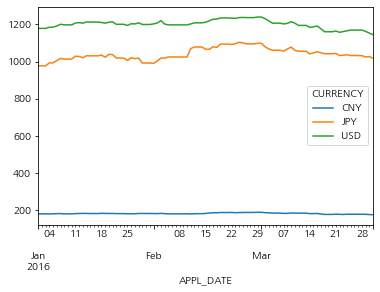

In [30]:
# 중국 위안, 일본 엔화, 미국 달러 전체 그림(엔화, 달러와 단위 차이)
df_currency_pivot.plot()

<AxesSubplot:xlabel='APPL_DATE'>

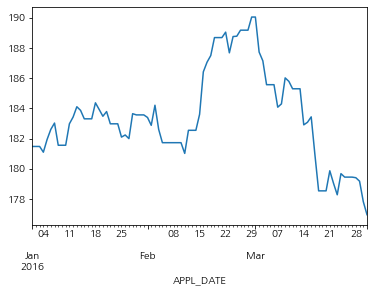

In [31]:
df_currency_pivot["CNY"].plot()

<AxesSubplot:xlabel='APPL_DATE'>

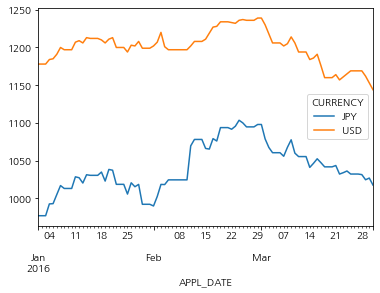

In [32]:
df_currency_pivot[["JPY", "USD"]].plot()

# 8. Heatmap 그리기

## Step1. Heatmap 생성: 성별 연령대별 혈당 산소 요구량

In [33]:
df_fitness.tail()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
26,Iris,여성,39,30대,75.98,45.681,11.95,176,70,180
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,44,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176
30,William,남성,45,40대,87.66,37.388,14.03,186,56,192


In [34]:
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")
df_agg

,GENDER,AGEGROUP,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,남성,30대,38.000000,81.080000,46.866250,10.355000,177.250000,57.000000,178.250000
1,남성,40대,45.500000,85.465000,44.410000,11.421667,173.666667,56.166667,178.166667
2,남성,50대,54.000000,79.426000,43.476200,11.592000,166.400000,54.200000,171.000000
3,여성,30대,38.500000,78.925000,52.868000,10.290000,173.000000,59.000000,183.000000
4,여성,40대,45.875000,72.943750,50.427125,9.956250,169.000000,50.375000,172.500000
5,여성,50대,52.166667,70.856667,48.031833,10.005000,163.000000,50.000000,167.333333


<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

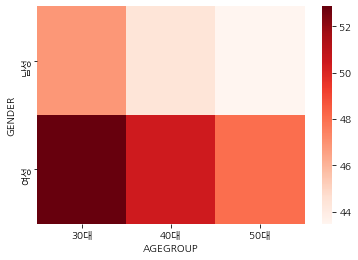

In [44]:
df_pivot = df_agg.pivot("GENDER","AGEGROUP", "OXY")
df_pivot
sns.heatmap(df_pivot, cmap="Reds")

# 9. Contour Plot

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

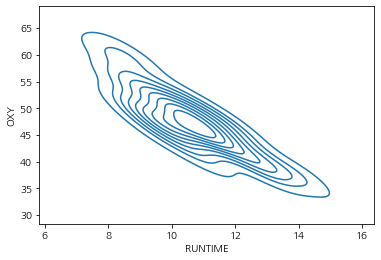

In [36]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade=False)

# 10. Parallel Plot

<AxesSubplot:>

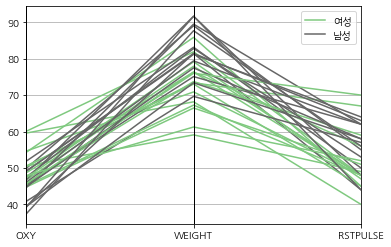

In [37]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER", 
                                 cols=["OXY", "WEIGHT", "RSTPULSE"],
                                 colormap="Accent")

# 11. Customizing 
- 운동에 따른 혈당 산소 요구량 데이터
- Histogram, PieChart, Trend Chart, Scatterplot을 이용해 Dashboard를 생성한다.

Text(486.6727272727271, 0.5, '혈당 산소 요구량')

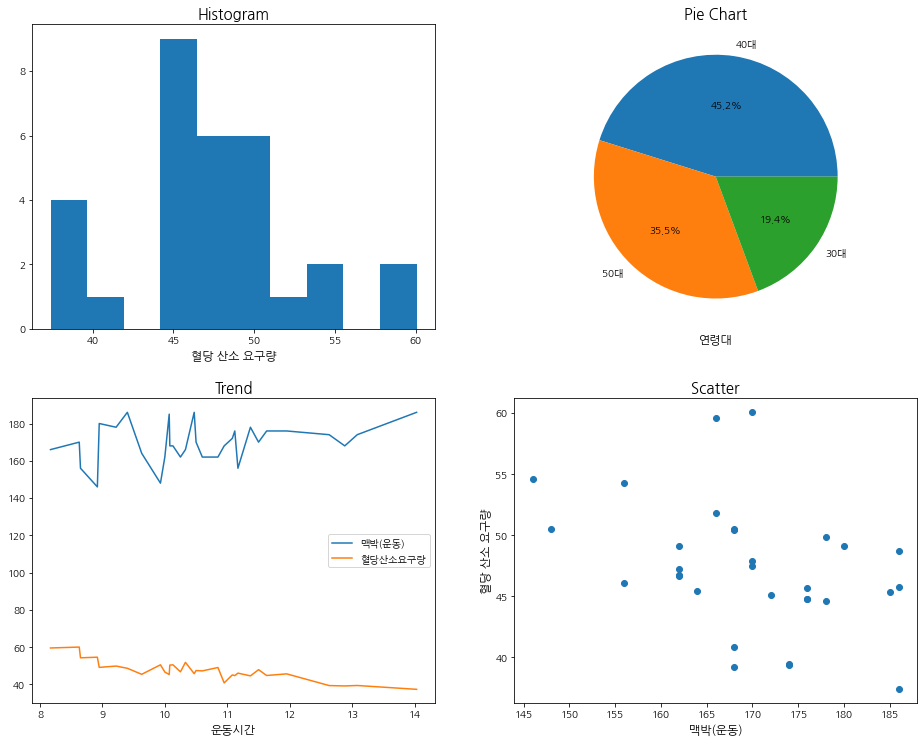

In [40]:
# PieChart를 위한 집계 데이터
df_count = df_fitness["AGEGROUP"].value_counts()

# 4개의 그래프 생성: (2, 2) 4분할
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))
plt.tight_layout(w_pad=5, h_pad=5)

# Histogram [0, 0]
axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram", fontsize=15) # 제목 설정, 글자 크기 15
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize=12)

# PieChart [0, 1]
axes[0,1].pie(df_count, labels=df_count.index.tolist(), autopct="%.1f%%")
axes[0,1].set_title("Pie Chart", fontsize=15) # 제목 설정, 글자 크기 15
axes[0,1].set_xlabel("연령대", fontsize=12)

# TrendChart [1, 0]
axes[1,0].plot("RUNTIME", "RUNPULSE", data=df_fitness, label="맥박(운동)")
axes[1,0].plot("RUNTIME", "OXY", data=df_fitness, label="혈당산소요구량")
axes[1,0].set_title("Trend", fontsize=15) # 제목 설정, 글자 크기 15
axes[1,0].set_xlabel("운동시간", fontsize=12)
axes[1,0].legend()

# Histogram [1, 1]
axes[1,1].scatter("RUNPULSE", "OXY", data=df_fitness)
axes[1,1].set_title("Scatter", fontsize=15) # 제목 설정, 글자 크기 15
axes[1,1].set_xlabel("맥박(운동)", fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize=12)

※ 다양한 종류의 그래프를 customizing하고 동시에 비교해 분석할 수 있는 Dashboard 생성

- 가설1: 선실등급은 생존에 영향을 주는 설명변수일 것이다.
    - 3클래스에 해당하는 사람들이 사람 수 대비 훨씬 많이 사망했고, 1클래스에 해당하는 사람들이 사람 수 대비 더 많이 생존했다.
    
- 가설2: 성별은 생존에 영향을 주는 설명변수일 것이다.
    - 여성이 남성보다 더 많이 생존했다고 볼 수 있다.
    
- 가설3: 나이는 생존에 영향을 주는 설명변수일 것이다.
    - 20 ~ 30대에서는 거의 차이가 없어 보인다. 하지만 나이가 어릴 수록 더 많이 사망했고, 나이가 많을 수록 더 많이 생존했음을 보여준다. 
    
- 가설4: 승선장소는 생존에 영향을 주는 설명변수일 것이다
    - 승선장소에 따라 달라 보인다. Southampton에서의 사람들이 훨씬 많이 사망한데 반해, Cherbourg나 Queenstown에서는 사망자와 생존자의 비율이 거의 비슷한 양상을 보인다.

- 가설5: 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.
    - 티켓에 따라서 생존과 사망 여부가 크게 달라보이지는 않는다.
    
- 가설6:함께 탑승수(부모, 자녀)는 생존에 영향을 주는 설명변수일 것이다.
    - 부모, 자녀 1명 이상 같이 탑승한 경우, 0명일 때보다 생존과 사망의 비율이 비슷하다. 


- 가설7:함께 탑승수(형제, 배우자)는 생존에 영향을 주는 설명변수일 것이다.
    - 형제 배우자 1명 이상 같이 탑승한 경우, 0명일 때보다 생존과 사망의 비율이 비슷하다. 